In [1]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('./combined_data/combined_full_data.csv')
data.head()

In [ ]:
data.shape

In [ ]:
data.info()

In [ ]:
data['Ratings'].unique()

In [ ]:
data['Ratings'].value_counts()

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.shape

In [ ]:
data['Ratings'].value_counts()

# Sampling to balance the data 

### Downsampling to balance the data

In [ ]:
size = len(np.where(data['Ratings']==2)[0])

In [ ]:
rating_5_downsampled = np.random.choice(np.where(data['Ratings']==5)[0],size=size//2, replace = False)
rating_4_downsampled = np.random.choice(np.where(data['Ratings']==4)[0],size=size//2, replace = False)
rating_1_downsampled = np.random.choice(np.where(data['Ratings']==1)[0],size=size//2, replace = False)
rating_3_downsampled = np.random.choice(np.where(data['Ratings']==3)[0],size=size//2, replace = False)
rating_2_downsampled = np.random.choice(np.where(data['Ratings']==2)[0],size=size//2, replace = False)

In [ ]:
downsampled_train_data_indexes = np.concatenate([rating_1_downsampled, rating_2_downsampled, rating_3_downsampled, rating_4_downsampled, rating_5_downsampled])
len(downsampled_train_data_indexes)

In [ ]:
train_data = data.iloc[downsampled_train_data_indexes].copy()
train_data

In [ ]:
remaining_data = data[~data.index.isin(downsampled_train_data_indexes)].copy()
remaining_data

In [ ]:
validation_rating_5_downsampled = np.random.choice(np.where(remaining_data['Ratings']==5)[0],size=size//4, replace = False)
validation_rating_4_downsampled = np.random.choice(np.where(remaining_data['Ratings']==4)[0],size=size//4, replace = False)
validation_rating_1_downsampled = np.random.choice(np.where(remaining_data['Ratings']==1)[0],size=size//4, replace = False)
validation_rating_3_downsampled = np.random.choice(np.where(remaining_data['Ratings']==3)[0],size=size//4, replace = False)
validation_rating_2_downsampled = np.random.choice(np.where(remaining_data['Ratings']==2)[0],size=size//4, replace = False)

In [ ]:
downsampled_val_data_indexes = np.concatenate([validation_rating_1_downsampled, validation_rating_2_downsampled, validation_rating_3_downsampled, validation_rating_4_downsampled, validation_rating_5_downsampled])
len(downsampled_val_data_indexes)

In [ ]:
val_data = remaining_data.iloc[downsampled_val_data_indexes].copy()
val_data['Ratings'].value_counts()

In [ ]:
train_data.reset_index(inplace=True)
train_data.drop(['index'], axis=1, inplace=True)
train_data

In [ ]:
val_data.reset_index(inplace=True)
val_data.drop(['index'], axis=1, inplace=True)
val_data

In [ ]:
train_data.to_csv('./combined_data/combined_downsampled_balanced_train_data.csv', sep =',', index = False)
val_data.to_csv('./combined_data/combined_downsampled_balanced_val_data.csv', sep =',', index = False)

### OverSampling to balance the data

In [ ]:
from google_trans_new import google_translator

import random
sr = random.SystemRandom()

language = ["es", "de", "fr", "ar", "te", "hi", "ja", "fa", "sq", "bg", "nl", "gu", "ig", "kk", "mt", "ps"]


def data_augmentation(message, language, aug_range=1):
    augmented_messages = []
    if hasattr(message, "decode"):
        message = message.decode("utf-8")

    for j in range(0,aug_range) :
        new_message = ""
        translator = google_translator()
        try:
            text = translator.translate(message,lang_tgt=sr.choice(language))   ## Converting to random langauge for meaningful variation
            text = translator.translate(text,lang_tgt="en")
        except:
            text = message
            pass
        augmented_messages.append(str(text))

    return augmented_messages

In [ ]:
## Dictionary for intent count
## Intent is column name
ratings_count = data.Ratings.value_counts().to_dict()
ratings_count

In [ ]:

## Get max intent count to match other minority classes through data augmentation
import operator
max_rating_count = max(ratings_count.items(), key=operator.itemgetter(1))[1]
max_rating_count

In [ ]:
## Loop to interate all messages
import numpy as np
import math
import tqdm
newdf = pd.DataFrame()

for rating, count in ratings_count.items() :
    count_diff = max_rating_count - count    ## Difference to fill
    multiplication_count = math.ceil((count_diff)/count)  ## Multiplying a minority classes for multiplication_count times
    if (multiplication_count) :
        old_reviews_df = pd.DataFrame()
        new_reviews_df = pd.DataFrame()
        for review in tqdm.tqdm(data[data["Ratings"] == rating]["Reviews"]) :
            ## Extracting existing minority class batch
            dummy1 = pd.DataFrame([review], columns=['Reviews'])
            dummy1["Ratings"] = rating
            old_reviews_df = old_reviews_df.append(dummy1)
            
            ## Creating new augmented batch from existing minority class
            new_reviews = data_augmentation(review, language, multiplication_count)
            dummy2 = pd.DataFrame(new_reviews, columns=['Reviews'])
            dummy2["Ratings"] = rating
            new_reviews_df = new_reviews_df.append(dummy2)
        
        ## Select random data points from augmented data
        new_reviews_df=new_reviews_df.take(np.random.permutation(len(new_reviews_df))[:count_diff])
        
        ## Merge existing and augmented data points
        newdf = newdf.append([old_reviews_df,new_reviews_df])
    else :
        newdf = newdf.append(data[data["Ratings"] == rating])

In [ ]:
newdf.to_csv('./combined_data/combined_balanced_data.csv', sep =',', index = False)

### References

https://github.com/lushan88a/google_trans_new
https://github.com/kothiyayogesh/medium-article-code/blob/master/How%20I%20dealt%20with%20Imbalanced%20text%20dataset/data_augmentation_using_language_translation.ipynb

In [ ]:
newdf.shape

In [ ]:
newdf['Ratings'].value_counts()

In [ ]:
newdf

## Data Preprocessing 

In [2]:
#train_data = pd.read_csv('./combined_data/combined_downsampled_balanced_train_data.csv')
#val_data = pd.read_csv('./combined_data/combined_downsampled_balanced_val_data.csv')
train_data = pd.read_csv('./combined_data/combined_balanced_data.csv')

In [3]:
train_data.head()

Reviews  Ratings
0   Super sounds.Super Bass quality and sound adhurs        5
1            Nice and good product.Very nice product        5
2  This headphone is awesome. Bass is very excell...        5
3              Service is awesome.Service is awesome        5
4            quality.superb sound...😍😍lovely product        5

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [5]:
print(f'Shape of the training data set is: {train_data.shape}')
#print(f'Shape of the validation data set is: {val_data.shape}')

Shape of the training data set is: (416220, 2)


In [6]:
print(f"Ratings count in the training data set is: {train_data['Ratings'].value_counts()}")

Ratings count in the training data set is: 5    83244
4    83244
3    83244
2    83244
1    83244
Name: Ratings, dtype: int64


In [ ]:
print(f"Ratings count in the validation data set is: {val_data['Ratings'].value_counts()}")

Creating a new feature to record the length of the reviews

In [7]:
train_data['review_length'] = train_data['Reviews'].str.len()
train_data.head()

Reviews  Ratings  review_length
0   Super sounds.Super Bass quality and sound adhurs        5           48.0
1            Nice and good product.Very nice product        5           39.0
2  This headphone is awesome. Bass is very excell...        5          115.0
3              Service is awesome.Service is awesome        5           37.0
4            quality.superb sound...😍😍lovely product        5           39.0

Converting all characters to lower case.

In [8]:
train_data['Reviews'] = train_data['Reviews'].str.lower()
train_data

Reviews  Ratings  \
0        super sounds.super bass quality and sound adhurs        5   
1                 nice and good product.very nice product        5   
2       this headphone is awesome. bass is very excell...        5   
3                   service is awesome.service is awesome        5   
4                 quality.superb sound...😍😍lovely product        5   
...                                                   ...      ...   
416215  they were alright to begin with, decent sound ...        2   
416216  resmi note 9 : 4gb ram is warking like 3gb ram...        2   
416217  good, but sometimes it disconnects and reconne...        2   
416218           nice products but colling ficher missing        2   
416219  boat bassheads 100 in-ear wired earphones with...        2   

        review_length  
0                48.0  
1                39.0  
2               115.0  
3                37.0  
4                39.0  
...               ...  
416215          349.0  
416216          141.0  
416217           77.0  
416218           40.0  
416219          152.0  

[416220 rows x 3 columns]

In [9]:
train_data['Reviews'] = train_data['Reviews'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress')

train_data['Reviews'] = train_data['Reviews'].str.replace(r"^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$",
                                             'webaddress')

train_data['Reviews'] = train_data['Reviews'].str.replace(r'£|\$|₹','currencyamount')

train_data['Reviews'] = train_data['Reviews'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

train_data['Reviews'] = train_data['Reviews'].str.replace(r'\d+(\.\d+)?','numbr')


In [10]:
train_data

Reviews  Ratings  \
0        super sounds.super bass quality and sound adhurs        5   
1                 nice and good product.very nice product        5   
2       this headphone is awesome. bass is very excell...        5   
3                   service is awesome.service is awesome        5   
4                 quality.superb sound...😍😍lovely product        5   
...                                                   ...      ...   
416215  they were alright to begin with, decent sound ...        2   
416216  resmi note numbr : numbrgb ram is warking like...        2   
416217  good, but sometimes it disconnects and reconne...        2   
416218           nice products but colling ficher missing        2   
416219  boat bassheads numbr in-ear wired earphones wi...        2   

        review_length  
0                48.0  
1                39.0  
2               115.0  
3                37.0  
4                39.0  
...               ...  
416215          349.0  
416216          141.0  
416217           77.0  
416218           40.0  
416219          152.0  

[416220 rows x 3 columns]

In [11]:
train_data['Reviews'] = train_data['Reviews'].str.replace(r'[^\w\d\s]',' ')
train_data['Reviews'] = train_data['Reviews'].str.replace(r'\s+',' ')

train_data

Reviews  Ratings  \
0        super sounds super bass quality and sound adhurs        5   
1                 nice and good product very nice product        5   
2       this headphone is awesome bass is very excelle...        5   
3                   service is awesome service is awesome        5   
4                     quality superb sound lovely product        5   
...                                                   ...      ...   
416215  they were alright to begin with decent sound q...        2   
416216  resmi note numbr numbrgb ram is warking like n...        2   
416217  good but sometimes it disconnects and reconnec...        2   
416218           nice products but colling ficher missing        2   
416219  boat bassheads numbr in ear wired earphones wi...        2   

        review_length  
0                48.0  
1                39.0  
2               115.0  
3                37.0  
4                39.0  
...               ...  
416215          349.0  
416216          141.0  
416217           77.0  
416218           40.0  
416219          152.0  

[416220 rows x 3 columns]

In [12]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [13]:
import string
import nltk
from nltk.corpus import stopwords

In [14]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\moncy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
train_data

Reviews  Ratings  \
0        super sounds super bass quality and sound adhurs        5   
1                 nice and good product very nice product        5   
2       this headphone is awesome bass is very excelle...        5   
3                   service is awesome service is awesome        5   
4                     quality superb sound lovely product        5   
...                                                   ...      ...   
416215  they were alright to begin with decent sound q...        2   
416216  resmi note numbr numbrgb ram is warking like n...        2   
416217  good but sometimes it disconnects and reconnec...        2   
416218           nice products but colling ficher missing        2   
416219  boat bassheads numbr in ear wired earphones wi...        2   

        review_length  
0                48.0  
1                39.0  
2               115.0  
3                37.0  
4                39.0  
...               ...  
416215          349.0  
416216          141.0  
416217           77.0  
416218           40.0  
416219          152.0  

[416220 rows x 3 columns]

In [16]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416220 entries, 0 to 416219
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Reviews        416200 non-null  object 
 1   Ratings        416220 non-null  int64  
 2   review_length  416200 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 9.5+ MB


In [17]:
train_data['reviews'] = train_data['Reviews'].astype('str')
train_data

Reviews  Ratings  \
0        super sounds super bass quality and sound adhurs        5   
1                 nice and good product very nice product        5   
2       this headphone is awesome bass is very excelle...        5   
3                   service is awesome service is awesome        5   
4                     quality superb sound lovely product        5   
...                                                   ...      ...   
416215  they were alright to begin with decent sound q...        2   
416216  resmi note numbr numbrgb ram is warking like n...        2   
416217  good but sometimes it disconnects and reconnec...        2   
416218           nice products but colling ficher missing        2   
416219  boat bassheads numbr in ear wired earphones wi...        2   

        review_length                                            reviews  
0                48.0   super sounds super bass quality and sound adhurs  
1                39.0            nice and good product very nice product  
2               115.0  this headphone is awesome bass is very excelle...  
3                37.0              service is awesome service is awesome  
4                39.0                quality superb sound lovely product  
...               ...                                                ...  
416215          349.0  they were alright to begin with decent sound q...  
416216          141.0  resmi note numbr numbrgb ram is warking like n...  
416217           77.0  good but sometimes it disconnects and reconnec...  
416218           40.0           nice products but colling ficher missing  
416219          152.0  boat bassheads numbr in ear wired earphones wi...  

[416220 rows x 4 columns]

In [18]:
stop_words = set(stopwords.words('english') + ['u','ur','im','doin','ure','i','so'])

train_data['reviews'] = train_data['reviews'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))
train_data

Reviews  Ratings  \
0        super sounds super bass quality and sound adhurs        5   
1                 nice and good product very nice product        5   
2       this headphone is awesome bass is very excelle...        5   
3                   service is awesome service is awesome        5   
4                     quality superb sound lovely product        5   
...                                                   ...      ...   
416215  they were alright to begin with decent sound q...        2   
416216  resmi note numbr numbrgb ram is warking like n...        2   
416217  good but sometimes it disconnects and reconnec...        2   
416218           nice products but colling ficher missing        2   
416219  boat bassheads numbr in ear wired earphones wi...        2   

        review_length                                            reviews  
0                48.0       super sounds super bass quality sound adhurs  
1                39.0                     nice good product nice product  
2               115.0  headphone awesome bass excellent good ear phon...  
3                37.0                    service awesome service awesome  
4                39.0                quality superb sound lovely product  
...               ...                                                ...  
416215          349.0  alright begin decent sound quality fit ears nu...  
416216          141.0  resmi note numbr numbrgb ram warking like numb...  
416217           77.0  good sometimes disconnects reconnects irritati...  
416218           40.0               nice products colling ficher missing  
416219          152.0  boat bassheads numbr ear wired earphones super...  

[416220 rows x 4 columns]

In [19]:
train_data['clean_length'] = train_data['reviews'].str.len()
train_data

Reviews  Ratings  \
0        super sounds super bass quality and sound adhurs        5   
1                 nice and good product very nice product        5   
2       this headphone is awesome bass is very excelle...        5   
3                   service is awesome service is awesome        5   
4                     quality superb sound lovely product        5   
...                                                   ...      ...   
416215  they were alright to begin with decent sound q...        2   
416216  resmi note numbr numbrgb ram is warking like n...        2   
416217  good but sometimes it disconnects and reconnec...        2   
416218           nice products but colling ficher missing        2   
416219  boat bassheads numbr in ear wired earphones wi...        2   

        review_length                                            reviews  \
0                48.0       super sounds super bass quality sound adhurs   
1                39.0                     nice good product nice product   
2               115.0  headphone awesome bass excellent good ear phon...   
3                37.0                    service awesome service awesome   
4                39.0                quality superb sound lovely product   
...               ...                                                ...   
416215          349.0  alright begin decent sound quality fit ears nu...   
416216          141.0  resmi note numbr numbrgb ram warking like numb...   
416217           77.0  good sometimes disconnects reconnects irritati...   
416218           40.0               nice products colling ficher missing   
416219          152.0  boat bassheads numbr ear wired earphones super...   

        clean_length  
0                 44  
1                 30  
2                 72  
3                 31  
4                 35  
...              ...  
416215           194  
416216           132  
416217            58  
416218            36  
416219           126  

[416220 rows x 5 columns]

In [20]:
print('Original Length', train_data.review_length.sum())
print('Clean Length', train_data.clean_length.sum())

Original Length 61913984.0
Clean Length 42531483


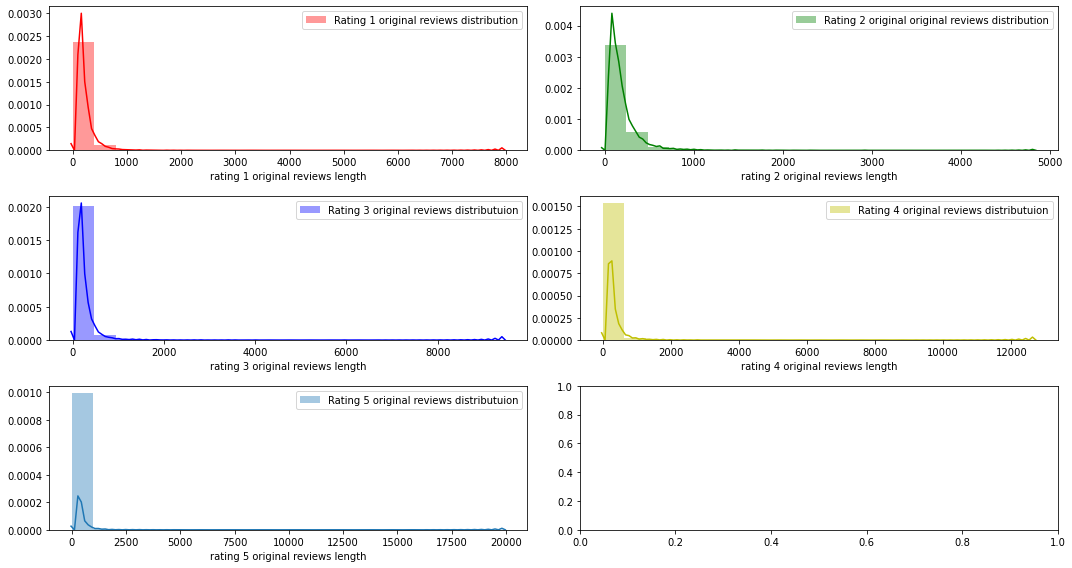

In [21]:
f, ax = plt.subplots(3,2,figsize=(15,8))
sns.distplot(train_data[train_data['Ratings']==1]['review_length'], bins=20,ax=ax[0,0],label = 'Rating 1 original reviews distribution',color='r')
ax[0,0].set_xlabel('rating 1 original reviews length')
ax[0,0].legend()

sns.distplot(train_data[train_data['Ratings']==2]['review_length'], bins=20,ax=ax[0,1],label = 'Rating 2 original original reviews distribution',color='g')
ax[0,1].set_xlabel('rating 2 original reviews length')
ax[0,1].legend()


sns.distplot(train_data[train_data['Ratings']==3]['review_length'],bins=20, ax=ax[1,0], label='Rating 3 original reviews distributuion',color='b')
ax[1,0].set_xlabel('rating 3 original reviews length')
ax[1,0].legend()

sns.distplot(train_data[train_data['Ratings']==4]['review_length'],bins=20, ax=ax[1,1], label='Rating 4 original reviews distributuion',color='y')
ax[1,1].set_xlabel('rating 4 original reviews length')
ax[1,1].legend()

sns.distplot(train_data[train_data['Ratings']==5]['review_length'],bins=20, ax=ax[2,0], label='Rating 5 original reviews distributuion')
ax[2,0].set_xlabel('rating 5 original reviews length')
ax[2,0].legend()

plt.tight_layout()

plt.show()

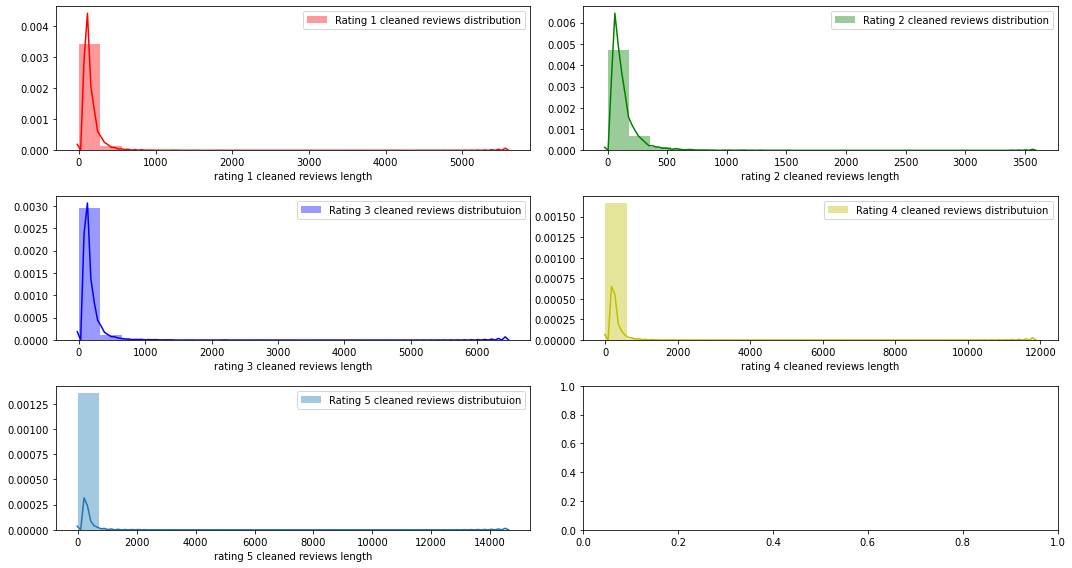

In [22]:
f, ax = plt.subplots(3,2,figsize=(15,8))
sns.distplot(train_data[train_data['Ratings']==1]['clean_length'], bins=20,ax=ax[0,0],label = 'Rating 1 cleaned reviews distribution',color='r')
ax[0,0].set_xlabel('rating 1 cleaned reviews length')
ax[0,0].legend()

sns.distplot(train_data[train_data['Ratings']==2]['clean_length'], bins=20,ax=ax[0,1],label = 'Rating 2 cleaned reviews distribution',color='g')
ax[0,1].set_xlabel('rating 2 cleaned reviews length')
ax[0,1].legend()


sns.distplot(train_data[train_data['Ratings']==3]['clean_length'],bins=20, ax=ax[1,0], label='Rating 3 cleaned reviews distributuion',color='b')
ax[1,0].set_xlabel('rating 3 cleaned reviews length')
ax[1,0].legend()

sns.distplot(train_data[train_data['Ratings']==4]['clean_length'],bins=20, ax=ax[1,1], label='Rating 4 cleaned reviews distributuion',color='y')
ax[1,1].set_xlabel('rating 4 cleaned reviews length')
ax[1,1].legend()

sns.distplot(train_data[train_data['Ratings']==5]['clean_length'],bins=20, ax=ax[2,0], label='Rating 5 cleaned reviews distributuion')
ax[2,0].set_xlabel('rating 5 cleaned reviews length')
ax[2,0].legend()

plt.tight_layout()

plt.show()

In [23]:
pip install WordCloud

Note: you may need to restart the kernel to use updated packages.


In [24]:
from wordcloud import WordCloud

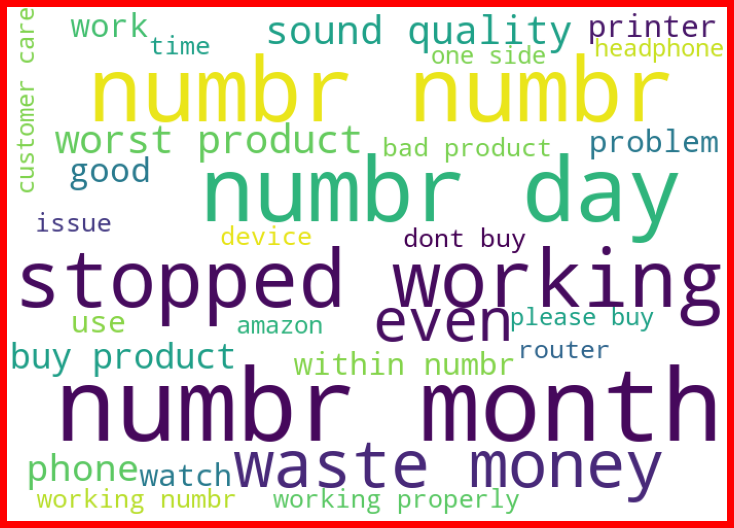

In [25]:
rating_1 = train_data[train_data['Ratings']==1]['reviews']

rating_1_cloud = WordCloud(width=700,height=500,background_color='white', max_words=30).generate(' '.join(rating_1))

plt.figure(figsize=(10,8), facecolor='r')
plt.imshow(rating_1_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

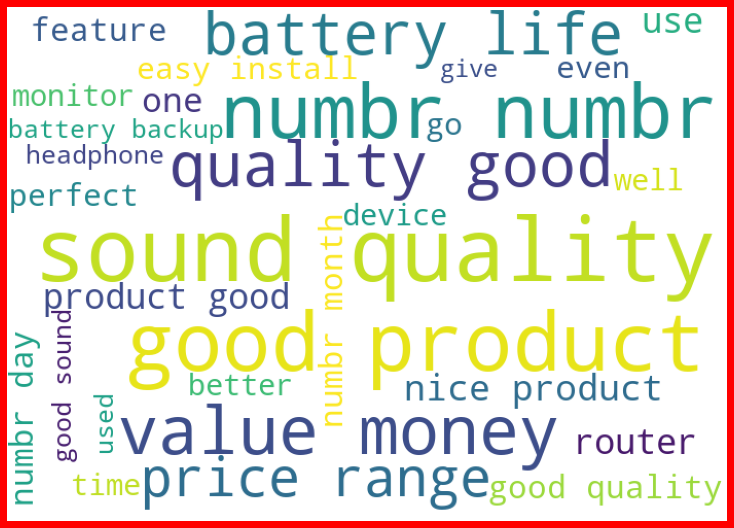

In [26]:
rating_5 = train_data[train_data['Ratings']==5]['reviews']

rating_5_cloud = WordCloud(width=700,height=500,background_color='white', max_words=30).generate(' '.join(rating_5))

plt.figure(figsize=(10,8), facecolor='r')
plt.imshow(rating_5_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

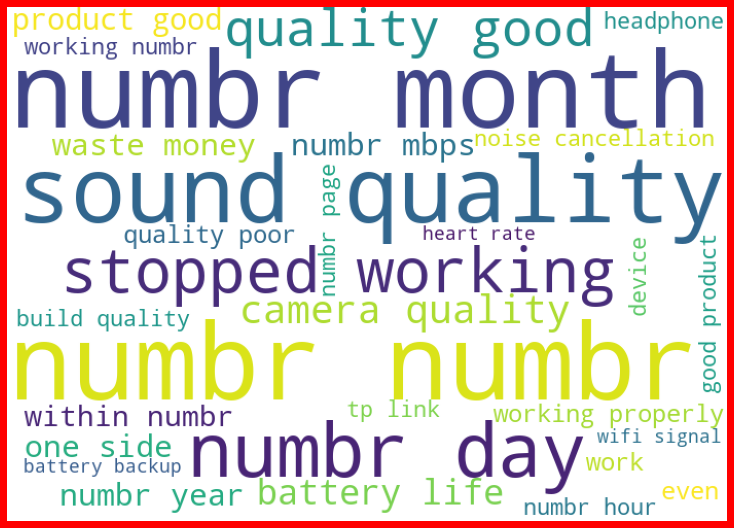

In [27]:
rating_2 = train_data[train_data['Ratings']==2]['reviews']

rating_2_cloud = WordCloud(width=700,height=500,background_color='white', max_words=30).generate(' '.join(rating_2))

plt.figure(figsize=(10,8), facecolor='r')
plt.imshow(rating_2_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

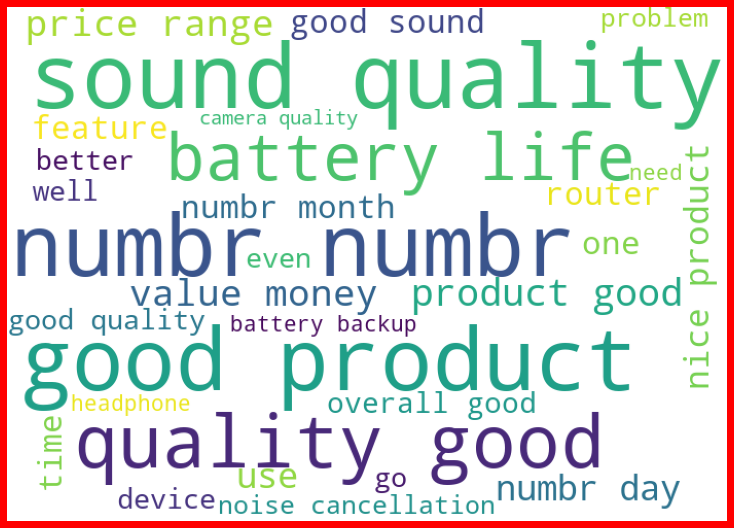

In [28]:
rating_4 = train_data[train_data['Ratings']==4]['reviews']

rating_4_cloud = WordCloud(width=700,height=500,background_color='white', max_words=30).generate(' '.join(rating_4))

plt.figure(figsize=(10,8), facecolor='r')
plt.imshow(rating_4_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

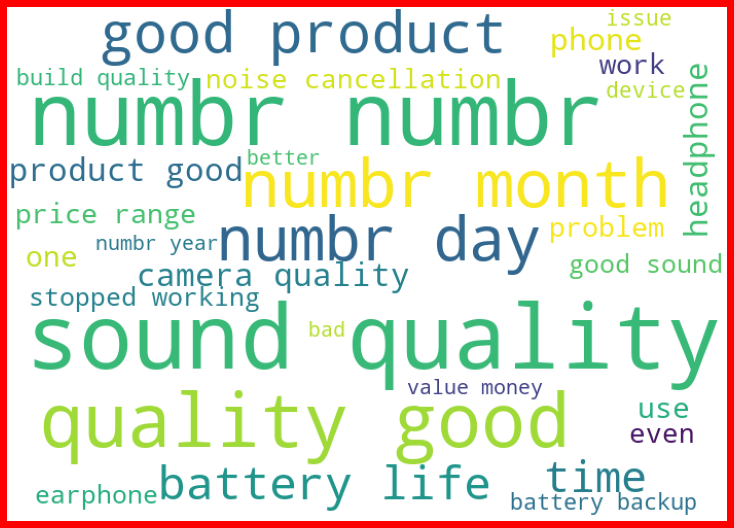

In [29]:
rating_3 = train_data[train_data['Ratings']==3]['reviews']

rating_3_cloud = WordCloud(width=700,height=500,background_color='white', max_words=30).generate(' '.join(rating_3))

plt.figure(figsize=(10,8), facecolor='r')
plt.imshow(rating_3_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [30]:
train_data

Reviews  Ratings  \
0        super sounds super bass quality and sound adhurs        5   
1                 nice and good product very nice product        5   
2       this headphone is awesome bass is very excelle...        5   
3                   service is awesome service is awesome        5   
4                     quality superb sound lovely product        5   
...                                                   ...      ...   
416215  they were alright to begin with decent sound q...        2   
416216  resmi note numbr numbrgb ram is warking like n...        2   
416217  good but sometimes it disconnects and reconnec...        2   
416218           nice products but colling ficher missing        2   
416219  boat bassheads numbr in ear wired earphones wi...        2   

        review_length                                            reviews  \
0                48.0       super sounds super bass quality sound adhurs   
1                39.0                     nice good product nice product   
2               115.0  headphone awesome bass excellent good ear phon...   
3                37.0                    service awesome service awesome   
4                39.0                quality superb sound lovely product   
...               ...                                                ...   
416215          349.0  alright begin decent sound quality fit ears nu...   
416216          141.0  resmi note numbr numbrgb ram warking like numb...   
416217           77.0  good sometimes disconnects reconnects irritati...   
416218           40.0               nice products colling ficher missing   
416219          152.0  boat bassheads numbr ear wired earphones super...   

        clean_length  
0                 44  
1                 30  
2                 72  
3                 31  
4                 35  
...              ...  
416215           194  
416216           132  
416217            58  
416218            36  
416219           126  

[416220 rows x 5 columns]

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [32]:
tf_vec = TfidfVectorizer()
naive = MultinomialNB()
rfc = RandomForestClassifier()

features = tf_vec.fit_transform(train_data['reviews'])

X = features
y = train_data['Ratings']

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size = 0.30, stratify = y, random_state = 42)

naive.fit(X_train, Y_train)
rfc.fit(X_train, Y_train)

RandomForestClassifier()

In [34]:
y_pred_naive = naive.predict(X_test)
y_pred_rfc = rfc.predict(X_test)

print('Final score: ', accuracy_score(Y_test, y_pred_naive))
print('Final score: ', accuracy_score(Y_test, y_pred_rfc))

Final score:  0.531537808530745
Final score:  0.8632453990678007


https://www.youtube.com/watch?v=BDmdujQYLMc

In [35]:
print(classification_report(Y_test, y_pred_naive))

              precision    recall  f1-score   support

           1       0.60      0.67      0.63     24973
           2       0.53      0.51      0.52     24973
           3       0.48      0.46      0.47     24973
           4       0.45      0.39      0.42     24974
           5       0.58      0.63      0.60     24973

    accuracy                           0.53    124866
   macro avg       0.53      0.53      0.53    124866
weighted avg       0.53      0.53      0.53    124866



In [36]:
print(classification_report(Y_test, y_pred_rfc))

              precision    recall  f1-score   support

           1       0.90      0.93      0.91     24973
           2       0.95      0.96      0.96     24973
           3       0.91      0.93      0.92     24973
           4       0.78      0.74      0.76     24974
           5       0.77      0.75      0.76     24973

    accuracy                           0.86    124866
   macro avg       0.86      0.86      0.86    124866
weighted avg       0.86      0.86      0.86    124866



In [2]:
import nltk
#nltk.download('all')

In [3]:
pip install snowballstemmer

Note: you may need to restart the kernel to use updated packages.


In [4]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from nltk import word_tokenize
from nltk.tokenize import RegexpTokenizer

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('word_tokenize')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\moncy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\moncy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Error loading word_tokenize: Package 'word_tokenize' not
[nltk_data]     found in index
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\moncy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
#train_data = pd.read_csv('./combined_data/combined_downsampled_balanced_train_data.csv')
#val_data = pd.read_csv('./combined_data/combined_downsampled_balanced_val_data.csv')
train_data = pd.read_csv('./combined_data/combined_balanced_data.csv')

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27755 entries, 0 to 27754
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Reviews  27754 non-null  object
 1   Ratings  27755 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 433.8+ KB


In [7]:
train_data.describe()

Ratings
count  27755.000000
mean       3.000000
std        1.414239
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000

In [8]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS, ImageColorGenerator

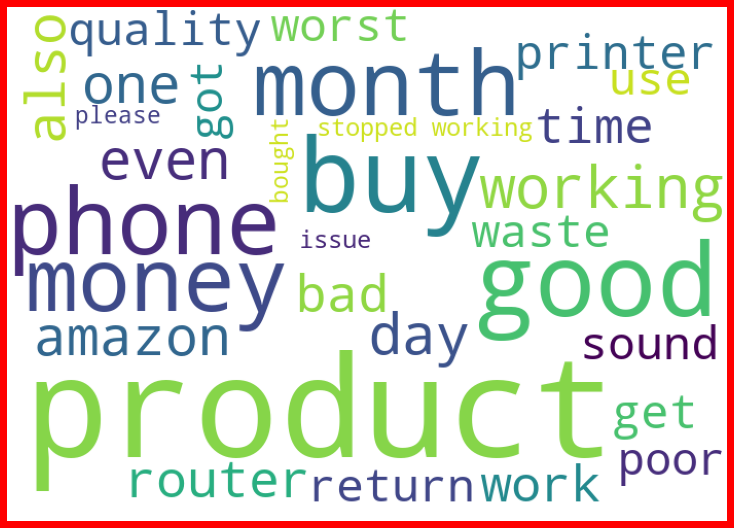

In [9]:
rating_1 = train_data[train_data['Ratings']==1]['Reviews']
rating_1 = [SnowballStemmer(language='english').stem(word) for word in rating_1]
rating_1 = " ".join(word for word in rating_1)

rating_1_cloud = WordCloud(stopwords = stopwords.words('english'),width=700,height=500,background_color='white', max_words=30).generate(rating_1)

plt.figure(figsize=(10,8), facecolor='r')
plt.imshow(rating_1_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [10]:
def clean_text(text):
    
    #convert all text to lowercase
    text = text.lower()
    
    #removing the special characters
    tokenizer = RegexpTokenizer(r'\w+')
    
    #tokenizing
    text = tokenizer.tokenize(text)
    
    #Lemmantizing the text
    text = [SnowballStemmer(language='english').stem(word) for word in text]
    
    #remove stopwords
    clean_text = [token for token in text if not token in stopwords.words('english')]
    clean_text = ' '.join(clean_text)
    
    return clean_text

In [11]:
train_data['reviews'] = train_data['Reviews'].astype('str')
train_data['cleaned_reviews'] = train_data['reviews'].apply(clean_text)
train_data

Reviews  Ratings  \
0      This product is very worst it's cartage is ver...        1   
1      Pls refund my amount as printer not working pr...        1   
2                       Poor quality signals and service        1   
3                        Printing pages not more than 50        1   
4                          The phone is lagging too much        1   
...                                                  ...      ...   
27750  Really very good product, value for money, on ...        5   
27751  JBL earphones are unbeatable..nice bass . And ...        5   
27752      Compact & simple device.Easy to use & manage.        5   
27753  Really good quality and quite comfortable. I b...        5   
27754  It's awesome 👏😊 I am really happy with it😍😉 it...        5   

                                                 reviews  \
0      This product is very worst it's cartage is ver...   
1      Pls refund my amount as printer not working pr...   
2                       Poor quality signals and service   
3                        Printing pages not more than 50   
4                          The phone is lagging too much   
...                                                  ...   
27750  Really very good product, value for money, on ...   
27751  JBL earphones are unbeatable..nice bass . And ...   
27752      Compact & simple device.Easy to use & manage.   
27753  Really good quality and quite comfortable. I b...   
27754  It's awesome 👏😊 I am really happy with it😍😉 it...   

                                         cleaned_reviews  
0      product veri worst cartag veri cost also wifi ...  
1      pls refund amount printer work proper vendor s...  
2                             poor qualiti signal servic  
3                                          print page 50  
4                                         phone lag much  
...                                                  ...  
27750  realli veri good product valu money time deliv...  
27751  jbl earphon unbeat nice bass thought jbl chang...  
27752                 compact simpl devic easi use manag  
27753  realli good qualiti quit comfort believ best p...  
27754     awesom realli happi total paisa wasool product  

[27755 rows x 4 columns]

In [12]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import make_pipeline

In [14]:
#Vectorizing
vectorizer = CountVectorizer()
tfidf = TfidfTransformer()

pipe = make_pipeline(vectorizer, tfidf)

https://www.youtube.com/watch?v=BDmdujQYLMc

In [15]:
reviews_array = pipe.fit_transform(train_data['cleaned_reviews']).todense()
reviews_array

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [22]:
print(f"The reviews have {reviews_array.shape[1]} columns.")

The reviews have 13304 columns.


In [24]:
from scipy.sparse import csr_matrix

In [28]:
X = csr_matrix(reviews_array)
print(X)

  (0, 1839)	0.21286045786792462
  (0, 3204)	0.4761738635050117
  (0, 3845)	0.29664127942980123
  (0, 8551)	0.5518054615649142
  (0, 9302)	0.1422047048902712
  (0, 11287)	0.26676627193510943
  (0, 12379)	0.32194093742586727
  (0, 12742)	0.2647734648109587
  (0, 12864)	0.26519084509578816
  (1, 1581)	0.3457498070864557
  (1, 1898)	0.32955147920384265
  (1, 5270)	0.3306934204154287
  (1, 9020)	0.34373660135207096
  (1, 9240)	0.22706705976219768
  (1, 9302)	0.12042603275547566
  (1, 9344)	0.23255179158513783
  (1, 9749)	0.30365143078800644
  (1, 10439)	0.34373660135207096
  (1, 12364)	0.4395249358605766
  (1, 12831)	0.14372361498188188
  (2, 9078)	0.5245169541060835
  (2, 9473)	0.32113133931138227
  (2, 10460)	0.5655082641932815
  (2, 10599)	0.54950617002583
  (3, 992)	0.6654316894204745
  :	:
  (27751, 12765)	0.14409474565825314
  (27752, 3636)	0.5154777540577704
  (27752, 4310)	0.34526106853892946
  (27752, 4777)	0.32090670127262527
  (27752, 7569)	0.5020220071053296
  (27752, 10618)	0.4

In [29]:
y = train_data['Ratings']

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

In [34]:
naive = MultinomialNB()

In [40]:
naive.fit(x_train, y_train)

y_pred_naive = naive.predict(x_test)

print('Final score: ', accuracy_score(y_test, y_pred_naive))


Final score:  0.43992073500270223


In [39]:
len(y_pred_naive)

5551

In [41]:
from sklearn.model_selection import GridSearchCV

In [ ]:
rfc = RandomForestClassifier()

param_rfc = {
    'min_samples_split': [1.0 , 2.0],
    'max_depth' : [2,10,100,500,1000],
    'n_estimators' : [50,100,200,500,1000]
}

grid_rfc = GridSearchCV(rfc, param_grid = param_rfc, scoring = 'accuracy', cv = 3)

grid_rfc.fit(x_train, y_train)

X:\AnacondaEnvironment\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "X:\AnacondaEnvironment\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "X:\AnacondaEnvironment\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 393, in fit
    for i, t in enumerate(trees))
  File "X:\AnacondaEnvironment\anaconda3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "X:\AnacondaEnvironment\anaconda3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "X:\AnacondaEnvironment\anaconda3\lib\site-packages\joblib\parallel.py", line 754, in _dispatch
    job = self._backend.apply_async(

X:\AnacondaEnvironment\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "X:\AnacondaEnvironment\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "X:\AnacondaEnvironment\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 393, in fit
    for i, t in enumerate(trees))
  File "X:\AnacondaEnvironment\anaconda3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "X:\AnacondaEnvironment\anaconda3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "X:\AnacondaEnvironment\anaconda3\lib\site-packages\joblib\parallel.py", line 754, in _dispatch
    job = self._backend.apply_async(

X:\AnacondaEnvironment\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "X:\AnacondaEnvironment\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "X:\AnacondaEnvironment\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 393, in fit
    for i, t in enumerate(trees))
  File "X:\AnacondaEnvironment\anaconda3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "X:\AnacondaEnvironment\anaconda3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "X:\AnacondaEnvironment\anaconda3\lib\site-packages\joblib\parallel.py", line 754, in _dispatch
    job = self._backend.apply_async(

X:\AnacondaEnvironment\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "X:\AnacondaEnvironment\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "X:\AnacondaEnvironment\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 393, in fit
    for i, t in enumerate(trees))
  File "X:\AnacondaEnvironment\anaconda3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "X:\AnacondaEnvironment\anaconda3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "X:\AnacondaEnvironment\anaconda3\lib\site-packages\joblib\parallel.py", line 754, in _dispatch
    job = self._backend.apply_async(

X:\AnacondaEnvironment\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "X:\AnacondaEnvironment\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "X:\AnacondaEnvironment\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 393, in fit
    for i, t in enumerate(trees))
  File "X:\AnacondaEnvironment\anaconda3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "X:\AnacondaEnvironment\anaconda3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "X:\AnacondaEnvironment\anaconda3\lib\site-packages\joblib\parallel.py", line 754, in _dispatch
    job = self._backend.apply_async(

X:\AnacondaEnvironment\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "X:\AnacondaEnvironment\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "X:\AnacondaEnvironment\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 393, in fit
    for i, t in enumerate(trees))
  File "X:\AnacondaEnvironment\anaconda3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "X:\AnacondaEnvironment\anaconda3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "X:\AnacondaEnvironment\anaconda3\lib\site-packages\joblib\parallel.py", line 754, in _dispatch
    job = self._backend.apply_async(

X:\AnacondaEnvironment\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "X:\AnacondaEnvironment\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "X:\AnacondaEnvironment\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 393, in fit
    for i, t in enumerate(trees))
  File "X:\AnacondaEnvironment\anaconda3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "X:\AnacondaEnvironment\anaconda3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "X:\AnacondaEnvironment\anaconda3\lib\site-packages\joblib\parallel.py", line 754, in _dispatch
    job = self._backend.apply_async(

X:\AnacondaEnvironment\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "X:\AnacondaEnvironment\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "X:\AnacondaEnvironment\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 393, in fit
    for i, t in enumerate(trees))
  File "X:\AnacondaEnvironment\anaconda3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "X:\AnacondaEnvironment\anaconda3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "X:\AnacondaEnvironment\anaconda3\lib\site-packages\joblib\parallel.py", line 754, in _dispatch
    job = self._backend.apply_async(

X:\AnacondaEnvironment\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "X:\AnacondaEnvironment\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "X:\AnacondaEnvironment\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 393, in fit
    for i, t in enumerate(trees))
  File "X:\AnacondaEnvironment\anaconda3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "X:\AnacondaEnvironment\anaconda3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "X:\AnacondaEnvironment\anaconda3\lib\site-packages\joblib\parallel.py", line 754, in _dispatch
    job = self._backend.apply_async(

X:\AnacondaEnvironment\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "X:\AnacondaEnvironment\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "X:\AnacondaEnvironment\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 393, in fit
    for i, t in enumerate(trees))
  File "X:\AnacondaEnvironment\anaconda3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "X:\AnacondaEnvironment\anaconda3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "X:\AnacondaEnvironment\anaconda3\lib\site-packages\joblib\parallel.py", line 754, in _dispatch
    job = self._backend.apply_async(

X:\AnacondaEnvironment\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "X:\AnacondaEnvironment\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "X:\AnacondaEnvironment\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 393, in fit
    for i, t in enumerate(trees))
  File "X:\AnacondaEnvironment\anaconda3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "X:\AnacondaEnvironment\anaconda3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "X:\AnacondaEnvironment\anaconda3\lib\site-packages\joblib\parallel.py", line 754, in _dispatch
    job = self._backend.apply_async(

X:\AnacondaEnvironment\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "X:\AnacondaEnvironment\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "X:\AnacondaEnvironment\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 393, in fit
    for i, t in enumerate(trees))
  File "X:\AnacondaEnvironment\anaconda3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "X:\AnacondaEnvironment\anaconda3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "X:\AnacondaEnvironment\anaconda3\lib\site-packages\joblib\parallel.py", line 754, in _dispatch
    job = self._backend.apply_async(

X:\AnacondaEnvironment\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "X:\AnacondaEnvironment\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "X:\AnacondaEnvironment\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 393, in fit
    for i, t in enumerate(trees))
  File "X:\AnacondaEnvironment\anaconda3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "X:\AnacondaEnvironment\anaconda3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "X:\AnacondaEnvironment\anaconda3\lib\site-packages\joblib\parallel.py", line 754, in _dispatch
    job = self._backend.apply_async(

X:\AnacondaEnvironment\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "X:\AnacondaEnvironment\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "X:\AnacondaEnvironment\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 393, in fit
    for i, t in enumerate(trees))
  File "X:\AnacondaEnvironment\anaconda3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "X:\AnacondaEnvironment\anaconda3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "X:\AnacondaEnvironment\anaconda3\lib\site-packages\joblib\parallel.py", line 754, in _dispatch
    job = self._backend.apply_async(

X:\AnacondaEnvironment\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "X:\AnacondaEnvironment\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "X:\AnacondaEnvironment\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 393, in fit
    for i, t in enumerate(trees))
  File "X:\AnacondaEnvironment\anaconda3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "X:\AnacondaEnvironment\anaconda3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "X:\AnacondaEnvironment\anaconda3\lib\site-packages\joblib\parallel.py", line 754, in _dispatch
    job = self._backend.apply_async(

In [ ]:
grid_rfc.best_score_